Dimensiones del dataset: (15000, 19)

Primeras filas:
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea            

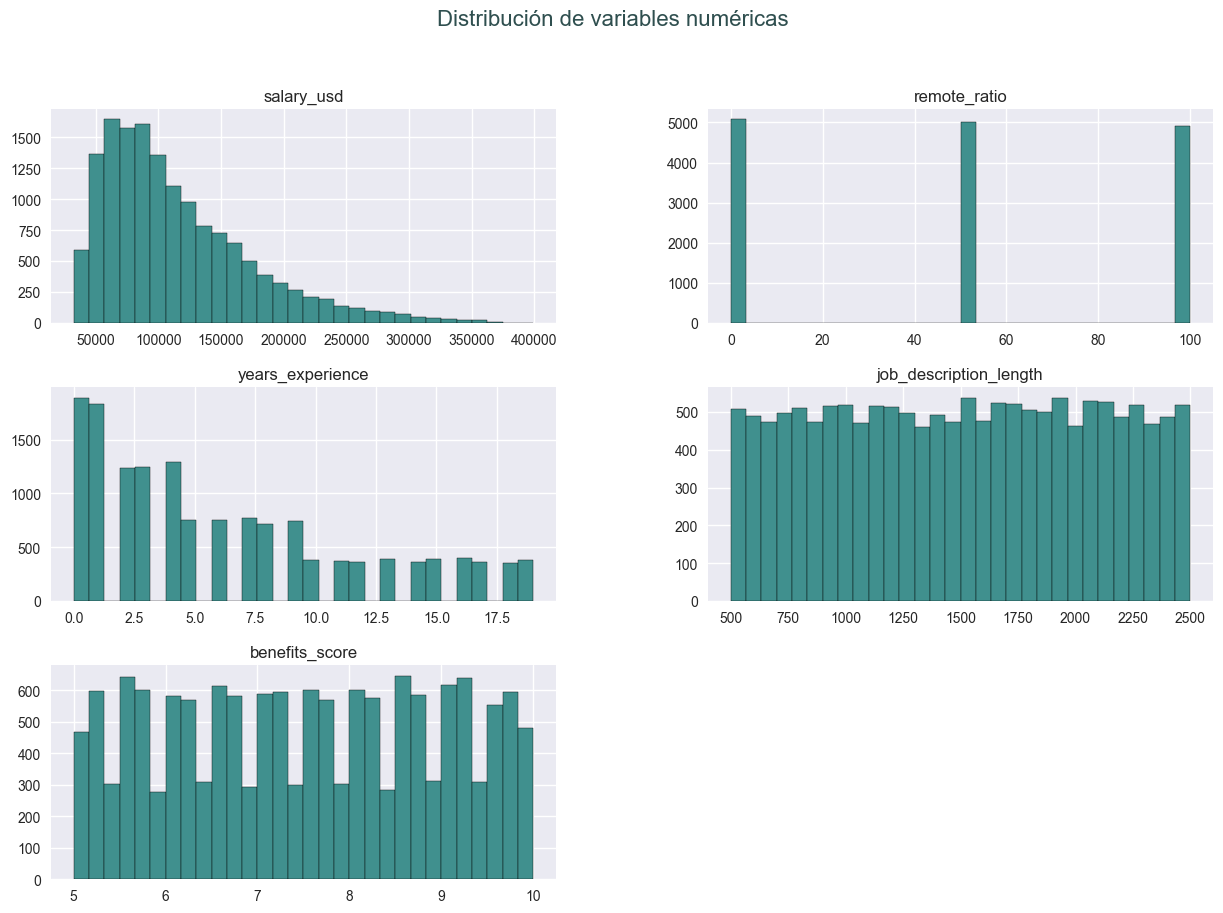

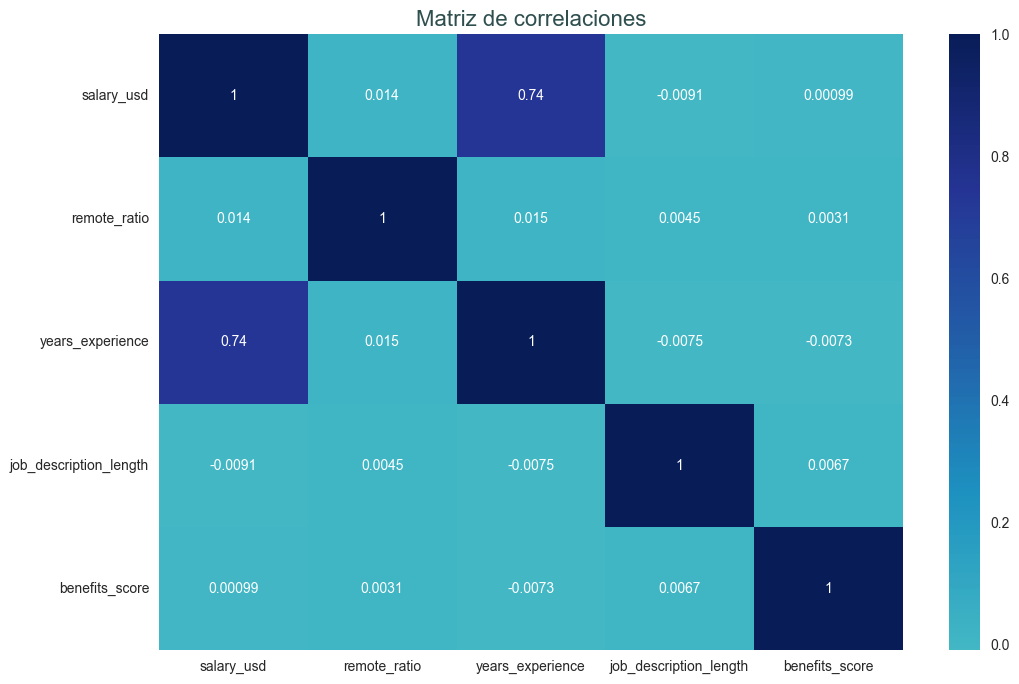

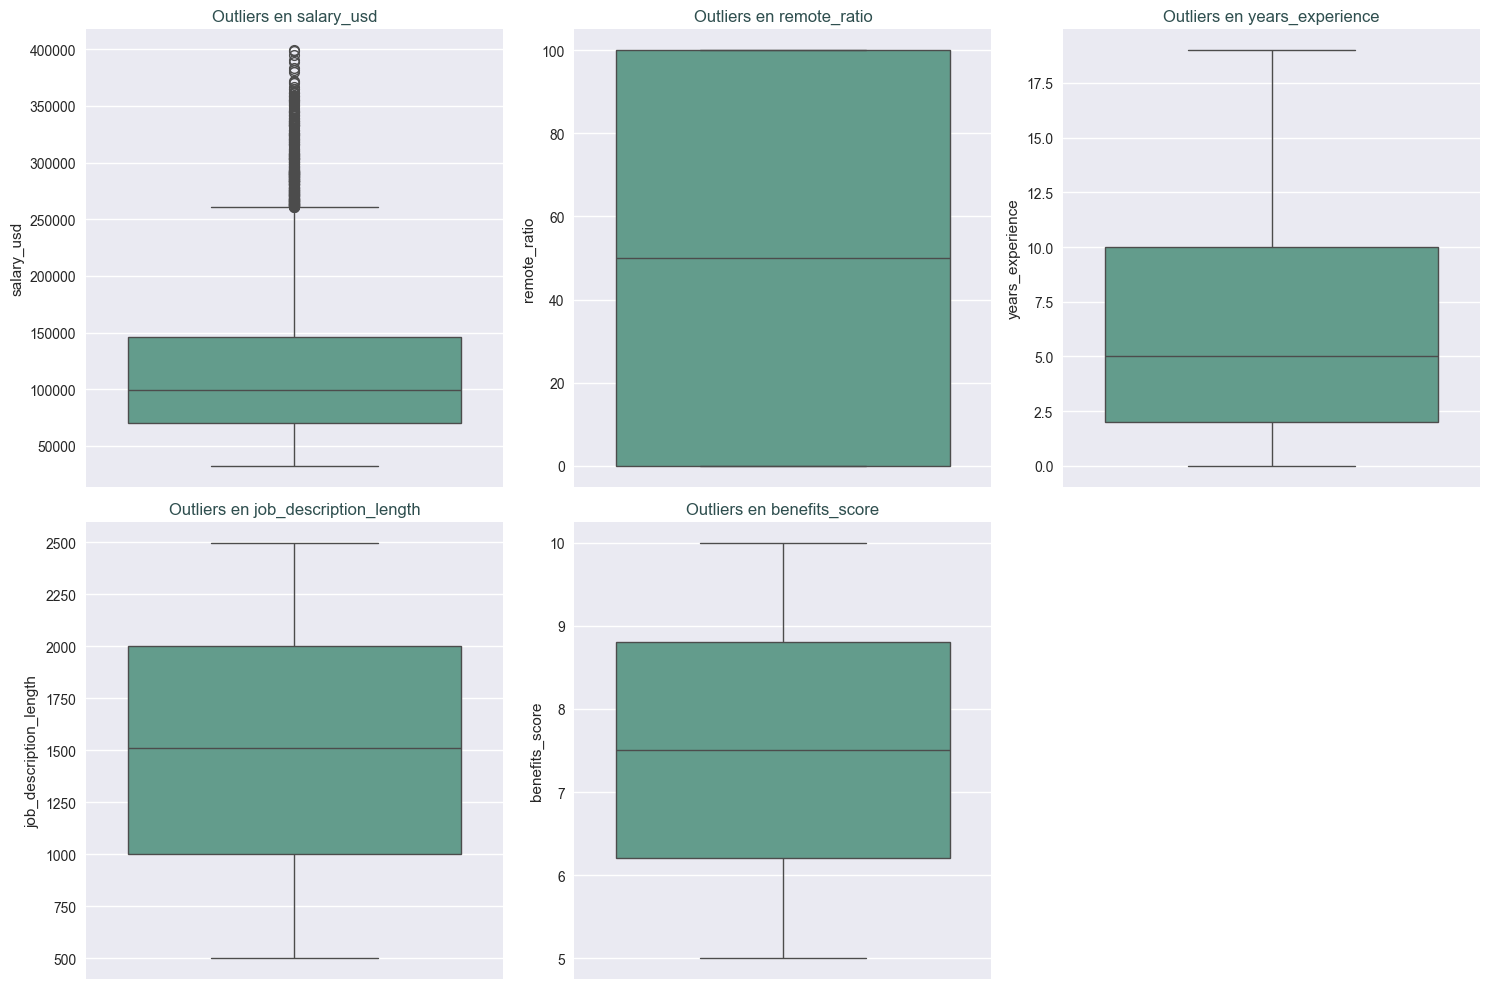

In [6]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética: tonos verde-azulados
custom_palette = sns.color_palette("crest")  # paleta azul-verde
sns.set_palette(custom_palette)


# 1. Cargar dataset
df = pd.read_csv("data/ai_job_dataset.csv")

# 2. Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

print("\nTipos de datos:")
print(df.dtypes)

# 3. Valores faltantes y duplicados
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de duplicados:", df.duplicated().sum())

# 4. Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe(include="all"))

# 5. Distribución de variables numéricas (histogramas)
df.hist(bins=30, figsize=(15, 10), edgecolor='black', color=custom_palette[2])
plt.suptitle("Distribución de variables numéricas", fontsize=16, color="darkslategray")
plt.show()

# 6. Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu", center=0)  # azul-verde
plt.title("Matriz de correlaciones", fontsize=16, color="darkslategray")
plt.show()

# 7. Boxplots para detectar outliers
num_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, y=col, color=custom_palette[1])  # azul verdoso
    plt.title(f"Outliers en {col}", color="darkslategray")
plt.tight_layout()
plt.show()


1. Exploratory Data Analysis (EDA)

El EDA inicial tuvo como objetivo comprender la estructura y calidad de los datos antes de aplicar modelos o análisis avanzados. Para ello, se llevaron a cabo las siguientes tareas:

Revisión de dimensiones del dataset y sus columnas.

Identificación de tipos de datos (numéricos, categóricos, fechas).

Detección de valores nulos y registros duplicados.

Obtención de estadísticas descriptivas de las variables.

Visualización de distribuciones de las variables numéricas mediante histogramas.

Análisis de correlaciones entre variables numéricas con un mapa de calor.

Detección de valores atípicos (outliers) mediante boxplots.

Resultado: Se obtuvo una visión general del dataset, identificando la calidad de los datos, posibles inconsistencias y patrones iniciales que guiarán las siguientes fases de análisis.

In [8]:
import pandas as pd

# ========================
# 1. EXTRACT
# ========================
# Intentar distintos delimitadores
for sep in [",", ";", "\t", "|"]:
    try:
        df = pd.read_csv("data/ai_job_dataset.csv", sep=sep)
        print(f"✔ Archivo leído correctamente con delimitador '{sep}'")
        print(df.head(5))
        break
    except Exception as e:
        continue

# ========================
# 2. TRANSFORM
# ========================

# Renombrar columnas (sin espacios, minúsculas, _ en vez de espacios)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w\s]", "", regex=True)

# Eliminar duplicados
df = df.drop_duplicates()

# Manejar valores nulos (ejemplo: rellenar con mediana en numéricas, "Desconocido" en categóricas)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Desconocido")
    else:
        df[col] = df[col].fillna(df[col].median())

# Convertir columnas de fechas (si existen)
date_cols = [col for col in df.columns if "date" in col or "fecha" in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Normalizar texto en columnas categóricas
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

# ========================
# 3. LOAD
# ========================
output_path = "data/ai_job_dataset_clean.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"\n✅ ETL completado. Dataset limpio guardado en: {output_path}")
print("Dimensiones finales:", df.shape)
print("Columnas:", df.columns.tolist())


✔ Archivo leído correctamente con delimitador ','
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0  

2. ETL (Extract – Transform – Load)

El proceso ETL tuvo como objetivo limpiar y preparar el dataset para que pueda ser utilizado en análisis avanzados. Se siguieron los siguientes pasos:

🔹 Extract

Lectura del archivo ai_job_dataset.csv, verificando delimitadores y estructura de columnas.

🔹 Transform

Normalización de nombres de columnas (formato snake_case).

Eliminación de registros duplicados.

Tratamiento de valores nulos: imputación en variables numéricas y categóricas.

Conversión de columnas de fecha a formato datetime.

Homogeneización de variables categóricas (minúsculas y sin espacios extra).

🔹 Load

Exportación del dataset procesado a un nuevo archivo: ai_job_dataset_clean.csv.

Resultado: Se obtuvo un dataset limpio, estandarizado y libre de duplicados, listo para análisis estadístico, modelado y visualización avanzada.